In [132]:
# load JSON
import json
import pandas as pd

df = pd.read_pickle('franklin-d-roosevelt/airQualityDataframe-franklin-d-roosevelt-PM10.pkl')
df = df.sort_values(by=['ds'])

df1 = df

Int64Index([33509, 29997, 30093, 17776, 12561, 45369, 42751,  3040, 44558,
            42563,
            ...
            58548, 56969, 58064, 58549, 15629, 58067, 15634, 58550, 58070,
            58205],
           dtype='int64', length=58551)

In [72]:
# Load the Pandas libraries with alias 'pd' 
df = pd.read_pickle('groundLevel/airQualityDataframe-ELYS.pkl')
df = df.sort_values(by=['ds'])

df2 = df
test = df2.y
test = test.astype(float)
df2.y = test

200


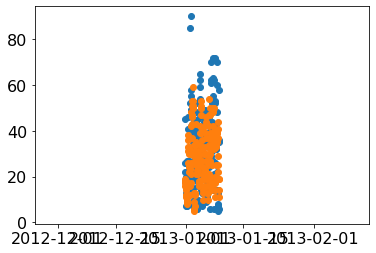

In [134]:
# merge two dataframes matching
df_merge = df1.merge(df2, left_on='ds', right_on='ds', how='inner')
df_merge_org = df_merge
df_merge = df_merge[0:200] # extract a small part

plt.scatter(df_merge['ds'],df_merge['y_x'])
plt.scatter(df_merge['ds'],df_merge['y_y'])
print(len(df_merge))

Text(0, 0.5, 'PM10,street')

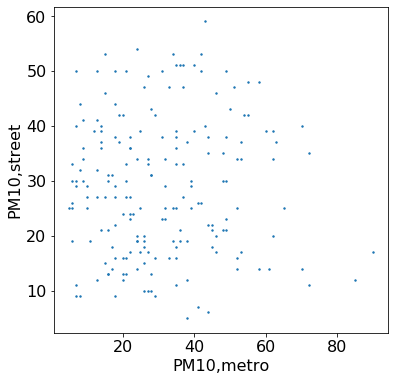

In [78]:
import matplotlib.pyplot as plt
import matplotlib

font = {'size': 16,             # font setting
       'weight':'normal'}       # font setting
matplotlib.rc('font', **font)   # font setting

plt.figure(figsize=(6, 6))
plt.scatter(df_merge['y_x'],df_merge['y_y'],2)
plt.xlabel('PM10,metro')
plt.ylabel('PM10,street')

In [79]:
# SARIMAX
import pmdarima as pm

df_merge = df_merge.dropna() # drop nan's (any rows with at least 1 NaN)

# SARIMAX Model
sxmodel = pm.auto_arima(df_merge[['y_x']], exogenous=df_merge[['y_y']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=1447.813, BIC=1466.971, Fit time=1.165 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=1687.654, BIC=1697.233, Fit time=0.047 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 12); AIC=1480.551, BIC=1496.516, Fit time=0.756 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=1486.803, BIC=1502.767, Fit time=0.709 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 1, 12); AIC=1449.691, BIC=1472.042, Fit time=2.448 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 0, 12); AIC=1532.634, BIC=1548.599, Fit time=0.372 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 2, 12); AIC=1449.700, BIC=1472.051, Fit time=4.845 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 2, 12); AIC=1450.728, BIC=1476.271, Fit time=4.839 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=1448.607, BIC=1470.957, Fit time=1.536 seconds
Fit ARIMA: order=(1, 0, 0) s

In [80]:
# ARIMAX model summary
sxmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  192
Model:             SARIMAX(0, 0, 3)x(0, 1, 1, 12)   Log Likelihood                -714.190
Date:                            Tue, 24 Sep 2019   AIC                           1442.379
Time:                                    11:52:06   BIC                           1464.730
Sample:                                         0   HQIC                          1451.442
                                            - 192                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4248      0.531      0.800      0.424      -0.617       1.466
x1             0.0224      0.169      0.133      0.895      -0.309       0.354
ma.L1          0.8663      0.060     14.398      0.000       0.748       0.984
ma.L2          0.7035      0.076      9.250      0.000       0.554       0.853
ma.L3          0.2936      0.074      3.988      0.000       0.149       0.438
ma.S.L12      -0.9167      0.102     -8.994      0.000      -1.116      -0.717
sigma2       144.5953     16.894      8.559      0.000     111.484     177.707
===================================================================================
Ljung-Box (Q):                       46.57   Jarque-Bera (JB):                13.60
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               1.93   Skew:                             0.22
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [182]:
# Forecast
import numpy as np
n_periods = 5
df_merge_fcst = df_merge_org[201:206]

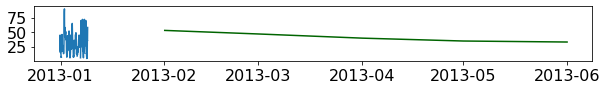

In [184]:
fitted, confint = sxmodel.predict(n_periods=n_periods, 
                                  exogenous=df_merge_fcst[['y_y']],
                                  return_conf_int=True)

index_of_fc = pd.date_range(df_merge.iloc[-1].ds, periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
#print(fitted_series)
plt.figure(figsize=(10,1))
plt.plot(df_merge['ds'],df_merge['y_x'])
#df_merge_fcst['fitted'] = fitted_series
#plt.figure(figsize=(10,1))
plt.plot(fitted_series, color='darkgreen')
#plt.fill_between(lower_series.index, 
#                 lower_series, 
#                 upper_series, 
#                 color='k', alpha=.15)

#plt.title("SARIMAX Forecast of a10 - Drug Sales")
#plt.show()